In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire 
import prepare 

# Exercises

### Using your store items data you acquired in lesson 1 exercises:

1. Convert date column to datetime format.

In [2]:
df = acquire.get_store_data()

In [3]:
df.head()

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
df.shape

(913000, 14)

In [5]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

2. Plot the distribution of sale_amount and item_price.

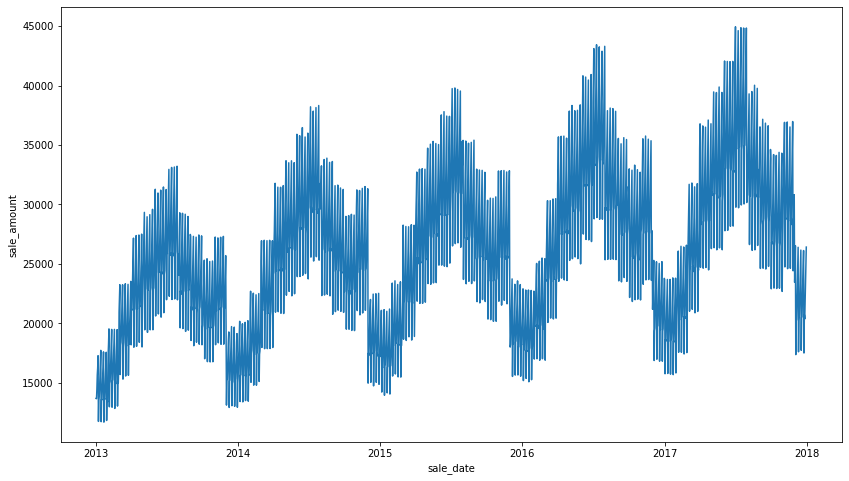

In [6]:
plt.figure(figsize=(14,8))
by_date = df.groupby(['sale_date'])['sale_amount'].sum().reset_index()
sns.lineplot(data=by_date, x='sale_date', y='sale_amount')

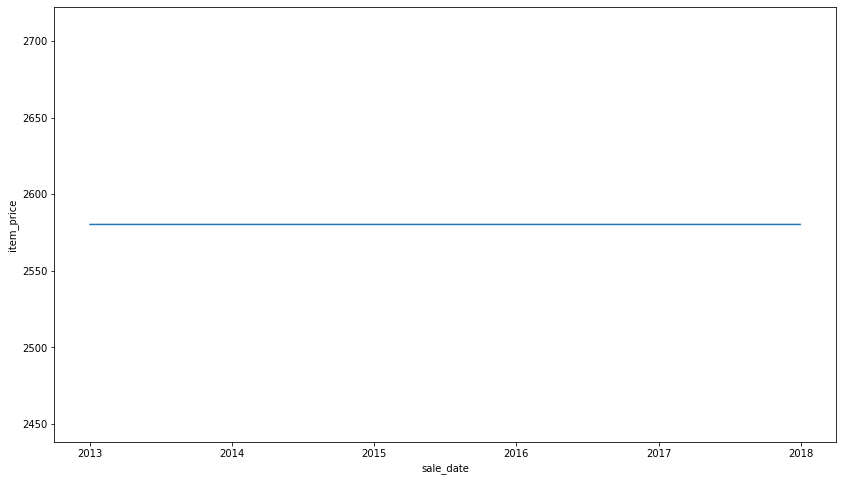

In [7]:
plt.figure(figsize=(14,8))
by_date = df.groupby(['sale_date'])['item_price'].sum().reset_index()
sns.lineplot(data=by_date, x='sale_date', y='item_price')

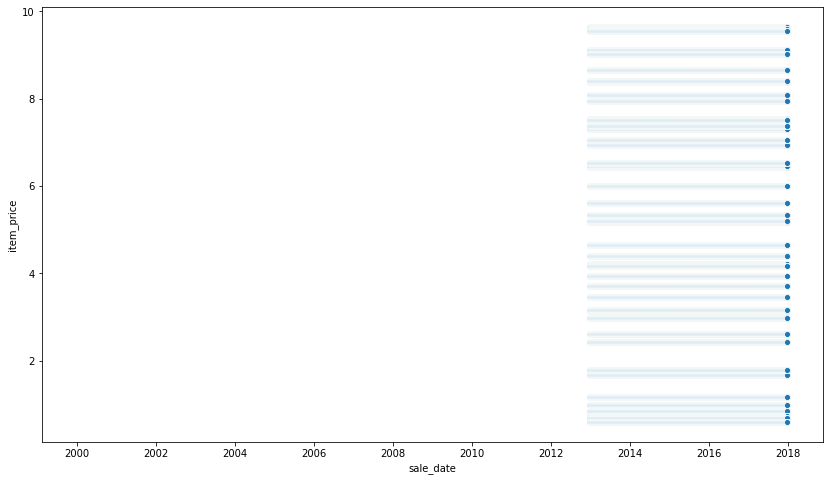

In [8]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='sale_date', y='item_price')

In [9]:
by_date

,sale_date,item_price
0,2013-01-01 00:00:00+00:00,2580.2
1,2013-01-02 00:00:00+00:00,2580.2
2,2013-01-03 00:00:00+00:00,2580.2
3,2013-01-04 00:00:00+00:00,2580.2
4,2013-01-05 00:00:00+00:00,2580.2
...,...,...
1821,2017-12-27 00:00:00+00:00,2580.2
1822,2017-12-28 00:00:00+00:00,2580.2
1823,2017-12-29 00:00:00+00:00,2580.2
1824,2017-12-30 00:00:00+00:00,2580.2


3. Set the index to be the datetime variable.

In [10]:
df = df.sort_values('sale_date').set_index('sale_date')

In [11]:
df.head(15)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01 00:00:00+00:00,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,29.0,350593,Usda Produce,20,Plums Black,5.62,204040000000,204040000000,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,32.0,107735,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01 00:00:00+00:00,25.0,368853,Doctors Best,21,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,753950001954,753950001954,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,50.0,387113,Betty Crocker,22,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,16000288829,16000288829,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [12]:
df['month'] = df.index.month

In [13]:
df['day_of_week'] = df.index.day_name()

In [14]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [15]:
df['sales_total'] = df.sale_amount * df.item_price

In [16]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48


6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [17]:
df['day_sales_diff'] = df.sale_amount.diff(1)

In [18]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total,day_sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16,13.0
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48,6.0


In [19]:
df.shape

(913000, 17)

7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [20]:
sales = prepare.prep_store_data()
sales.shape

(913000, 17)

In [21]:
sales.isna().sum()

sale_amount       0
sale_id           0
item_brand        0
item_id           0
item_name         0
item_price        0
item_upc12        0
item_upc14        0
store_address     0
store_city        0
store_id          0
store_state       0
store_zipcode     0
month             0
day_of_week       0
sales_total       0
day_sales_diff    1
dtype: int64

### Using the OPS data acquired in lesson 1 exercises:

1. Convert date column to datetime format.

In [22]:
df = acquire.read_german()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [23]:
df['Date'] = pd.to_datetime(df['Date'])

2. Plot the distribution of each of your variables.

3. Set the index to be the datetime variable.

In [24]:
df = df.sort_values('Date').set_index('Date')

4. Add a month and a year column to your dataframe.

In [25]:
df['year'] = df.index.year

In [26]:
df['month'] = df.index.month

In [27]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2006-01-03,1442.533,NaN,NaN,NaN,2006,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1
2006-01-05,1477.131,NaN,NaN,NaN,2006,1


5. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [28]:
ops = prepare.prep_ops_data()
ops.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### Install and use the vega_datasets for the next exercise
For the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [29]:
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
temp    8759 non-null float64
date    8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [31]:
df = df.set_index('date')

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

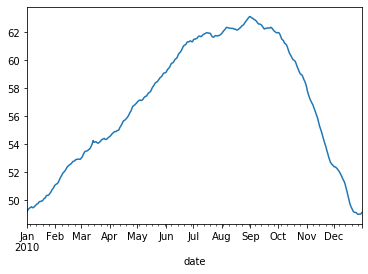

In [32]:
df.temp.resample("D").mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

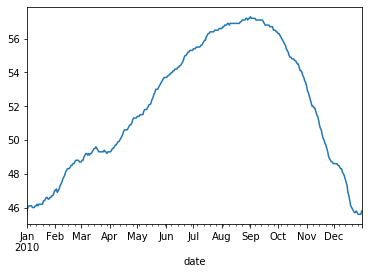

In [33]:
df.temp.resample("D").min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

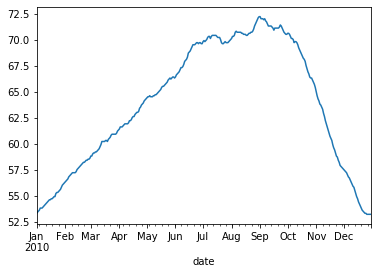

In [34]:
df.temp.resample("D").max().plot()

4. Which month is the coldest, on average?

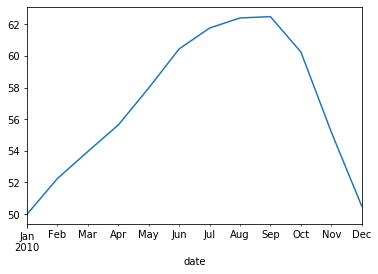

In [35]:
df.temp.resample("M").mean().plot()

In [36]:
# January
df.temp.resample("M").mean().min()

49.984139784946244

5. Which month has the highest average temperature?

In [37]:
# September
df.temp.resample("M").mean().max()

62.48708333333335

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [38]:
rs = pd.DataFrame(data=df.temp.resample("D").agg(['min', 'max']))

In [39]:
rs['diff'] = (rs['max'] - rs['min'])
rs.head()

,min,max,diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [40]:
rs['diff'].resample("M").sum().sort_values(ascending=False).head(1)

date
2010-07-31    433.3
Name: diff, dtype: float64

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [41]:
rs2 = pd.DataFrame(data=df.temp.resample("D").agg(['min', 'max', 'mean']))
rs2.head()

,min,max,mean
date,,,
2010-01-01,45.8,53.3,49.170833
2010-01-02,46.0,53.4,49.304167
2010-01-03,46.1,53.5,49.391667
2010-01-04,46.1,53.6,49.445833
2010-01-05,46.1,53.8,49.491667


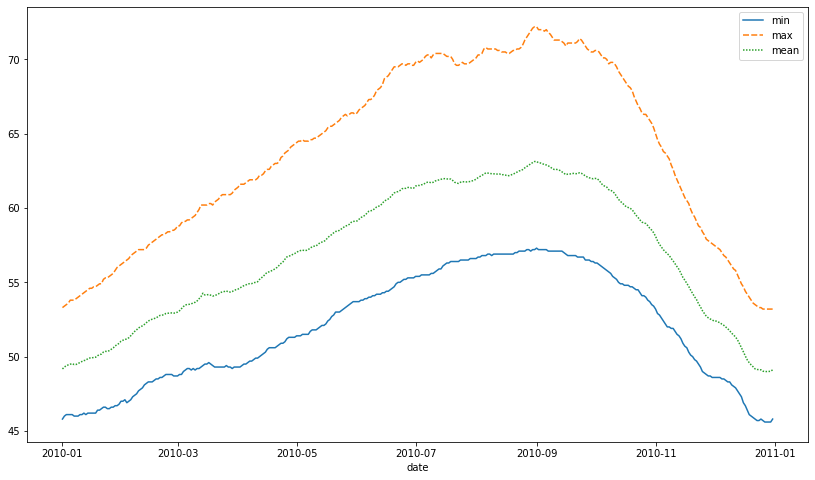

In [42]:
plt.figure(figsize=(14,8))
sns.lineplot(data=rs2)

Use the Vega_Datasets to work with the flights_20k data

In [43]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
date           20000 non-null datetime64[ns]
delay          20000 non-null int64
distance       20000 non-null int64
origin         20000 non-null object
destination    20000 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [45]:
df = df.set_index('date')

1. Convert any negative delays to 0.

In [46]:
df['delay'] = df['delay'].clip(lower=0)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


2. Which hour of the day has the highest average delay?

In [47]:
df['hour'] = df.index.hour
df.groupby('hour').delay.mean().sort_values(ascending=False)

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
21     21.626768
20     17.889778
19     16.256557
18     14.514218
16     13.881068
17     13.199580
15     13.137592
13     11.453311
14     10.747320
12      9.214341
11      7.361495
10      5.850953
9       5.002504
8       4.030483
7       3.071932
6       2.494856
5       0.513514
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [48]:
df['day_of_week'] = df.index.day_name()
df.groupby(['day_of_week', 'hour']).delay.mean().sort_values(ascending=False)

day_of_week  hour
Friday       3       360.000000
Sunday       0       260.000000
Tuesday      3       245.000000
Thursday     0       184.333333
Friday       1       170.000000
                        ...    
Saturday     5         1.000000
Wednesday    5         0.000000
Monday       5         0.000000
Tuesday      5         0.000000
Friday       5         0.000000
Name: delay, Length: 141, dtype: float64

4. Does the month make a difference in the delay amount?

In [49]:
df['month'] = df.index.month
df.groupby(['month', 'hour']).delay.mean().sort_values(ascending=False)

month  hour
2      3       360.000000
1      3       245.000000
       1       170.000000
2      0       167.000000
3      0       123.500000
                  ...    
2      6         2.375405
3      6         2.360947
1      5         0.777778
3      5         0.705882
2      5         0.000000
Name: delay, Length: 63, dtype: float64

In [50]:
df.head()

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,1
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,1
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,2
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,1
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,3
